# EDA (Exploratory Data Analysis)

## Titanic Dataset

In [14]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
import missingno

In [9]:
train = pd.read_csv('train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:>

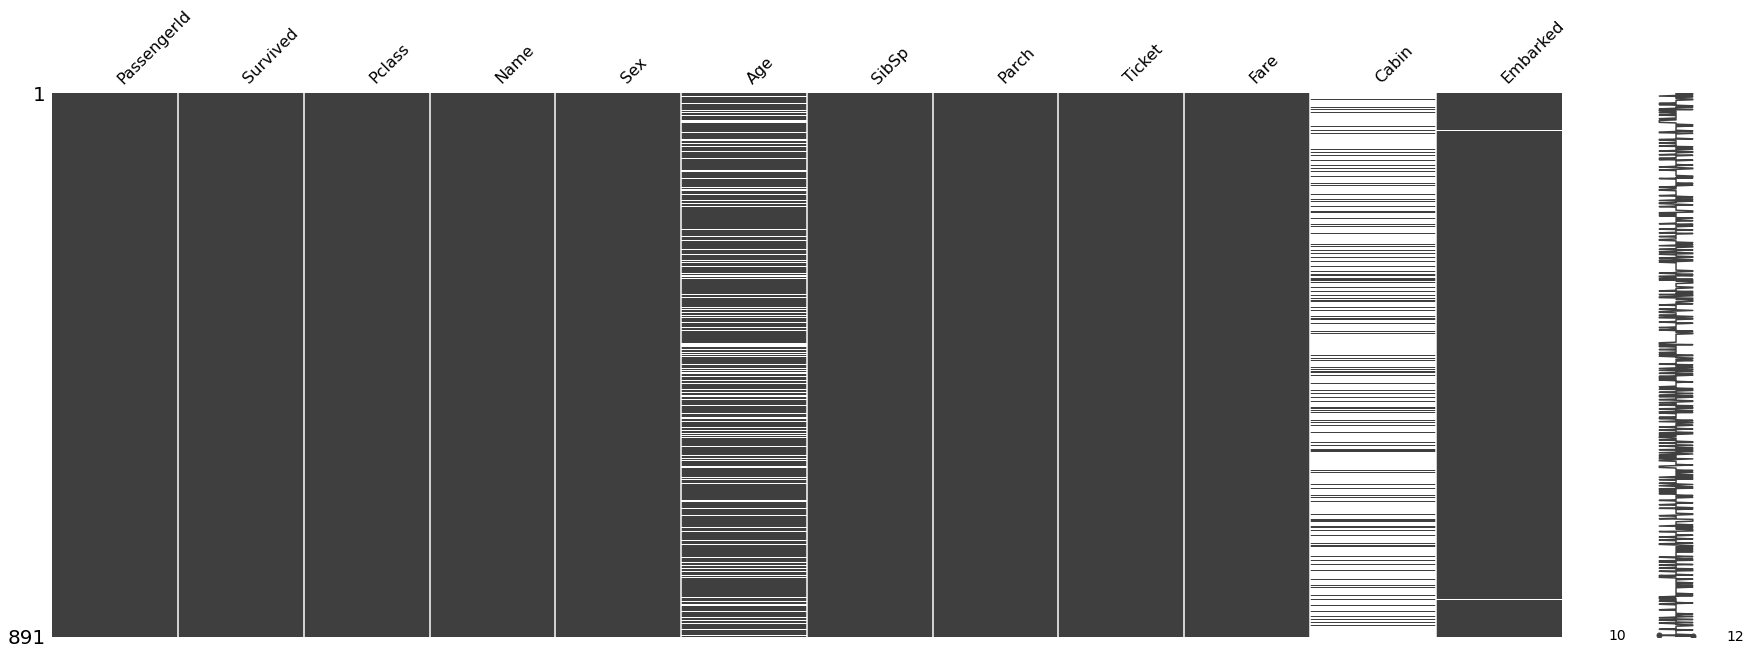

In [10]:
# plot shows estimate of missing values for each column

missingno.matrix(train, figsize=(30, 10))

In [12]:
# gives you the exact number of missing values

train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<AxesSubplot:xlabel='Survived', ylabel='count'>

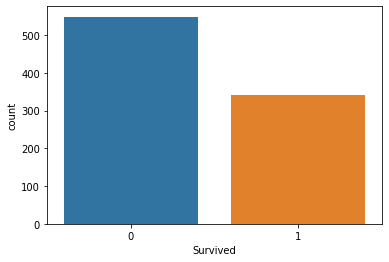

In [15]:
sns.countplot('Survived', data=train)

0    549
1    342
Name: Survived, dtype: int64


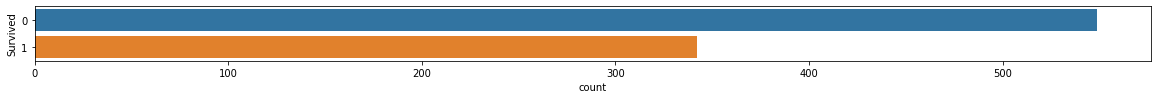

In [18]:
fig = plt.figure(figsize=(20, 1))
sns.countplot(y='Survived', data=train)
print(train.Survived.value_counts())

In [19]:
# value_counts() gives the number of unique values in a columns

## Feature : Pclass

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


3    491
1    216
2    184
Name: Pclass, dtype: int64

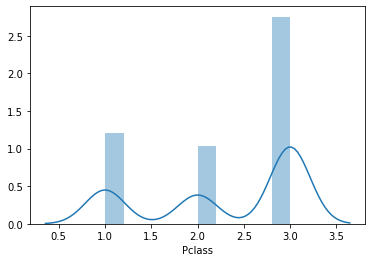

In [24]:
sns.distplot(train.Pclass)

train.Pclass.value_counts()

In [25]:
# Here if there was any value of say 10 (out of :  1, 2, 3), then it would be outlier

### Nominal and Ordinal Variables

In [30]:
# Nominal Data:
# Number is just an identifier (label). The "number" has no significance.
# Also called categorical data

# Ordinal Data:
# Number is more than just an identifier. The order matters
# Higher number means more of a particular property
# Used for ranking/placements

### Feature : Sex

male      577
female    314
Name: Sex, dtype: int64


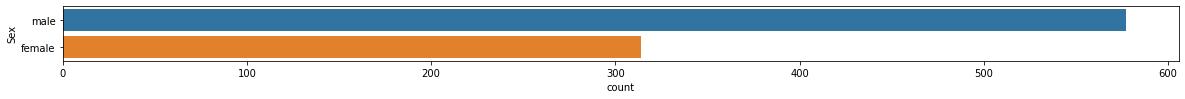

In [27]:
plt.figure(figsize=(20, 1))
sns.countplot(y='Sex', data=train)
print(train.Sex.value_counts())

### Feature: Fare

In [39]:
fare_bins = pd.cut(train.Fare, bins=5)
fare_bins


0      (-0.512, 102.466]
1      (-0.512, 102.466]
2      (-0.512, 102.466]
3      (-0.512, 102.466]
4      (-0.512, 102.466]
             ...        
886    (-0.512, 102.466]
887    (-0.512, 102.466]
888    (-0.512, 102.466]
889    (-0.512, 102.466]
890    (-0.512, 102.466]
Name: Fare, Length: 891, dtype: category
Categories (5, interval[float64]): [(-0.512, 102.466] < (102.466, 204.932] < (204.932, 307.398] < (307.398, 409.863] < (409.863, 512.329]]

In [40]:
fare_bins.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

In [44]:
# pd.cut() is used to convert from a continuous variable to a categorical variable
# By changing continuous values to bins of discrete categories

<AxesSubplot:xlabel='Fare'>

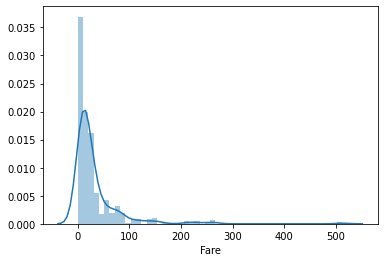

In [46]:
sns.distplot(train.Fare)

# visual idea

In [47]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Age'>

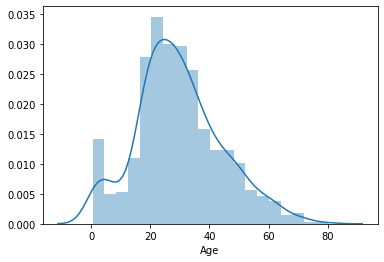

In [48]:
sns.distplot(train.Age)

In [56]:
fbins = pd.qcut(train.Fare, 6)
fbins

0        (-0.001, 7.775]
1      (52.369, 512.329]
2         (7.775, 8.662]
3      (52.369, 512.329]
4         (7.775, 8.662]
             ...        
886      (8.662, 14.454]
887       (26.0, 52.369]
888       (14.454, 26.0]
889       (26.0, 52.369]
890      (-0.001, 7.775]
Name: Fare, Length: 891, dtype: category
Categories (6, interval[float64]): [(-0.001, 7.775] < (7.775, 8.662] < (8.662, 14.454] < (14.454, 26.0] < (26.0, 52.369] < (52.369, 512.329]]

In [57]:
fbins.value_counts()

(-0.001, 7.775]      156
(7.775, 8.662]       152
(52.369, 512.329]    149
(14.454, 26.0]       149
(26.0, 52.369]       146
(8.662, 14.454]      139
Name: Fare, dtype: int64

### pd.cut() and pd.qcut()

In [58]:
# pd.cut() is used to split the data into "equally spaced" bins.
# ex: if values are between 0 and 500 and you select 5 bins, then you'll have
# 0-100 , 100-200, .... 400-500

In [59]:
# pd.qcut() is quartile split and data is split into "equally sized" bins
# the split happens such that the value_counts() of each bin is similiar

## More EDA

In [82]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


0    549
1    342
Name: Survived, dtype: int64


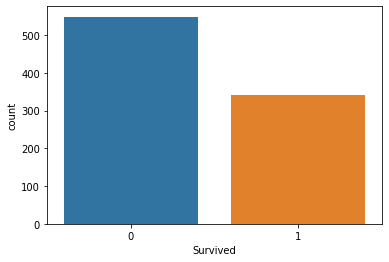

In [83]:
sns.countplot(train.Survived)
print(train.Survived.value_counts())

In [84]:
# We can set hue here

<AxesSubplot:xlabel='Survived', ylabel='count'>

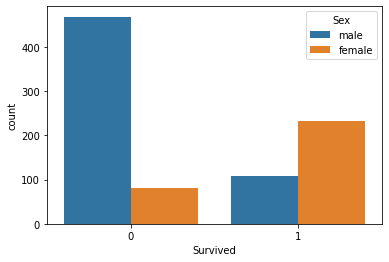

In [85]:
sns.countplot(x="Survived", hue="Sex", data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

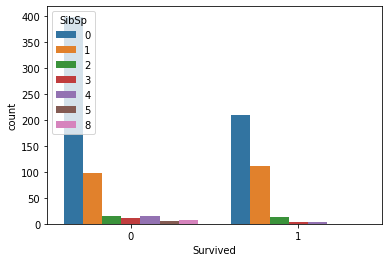

In [86]:
sns.countplot(x="Survived", hue='SibSp', data=train)

In [87]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [162]:
df = train.drop(['PassengerId', 'Name', 'Ticket'], axis='columns')

In [163]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,25.0,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


<AxesSubplot:>

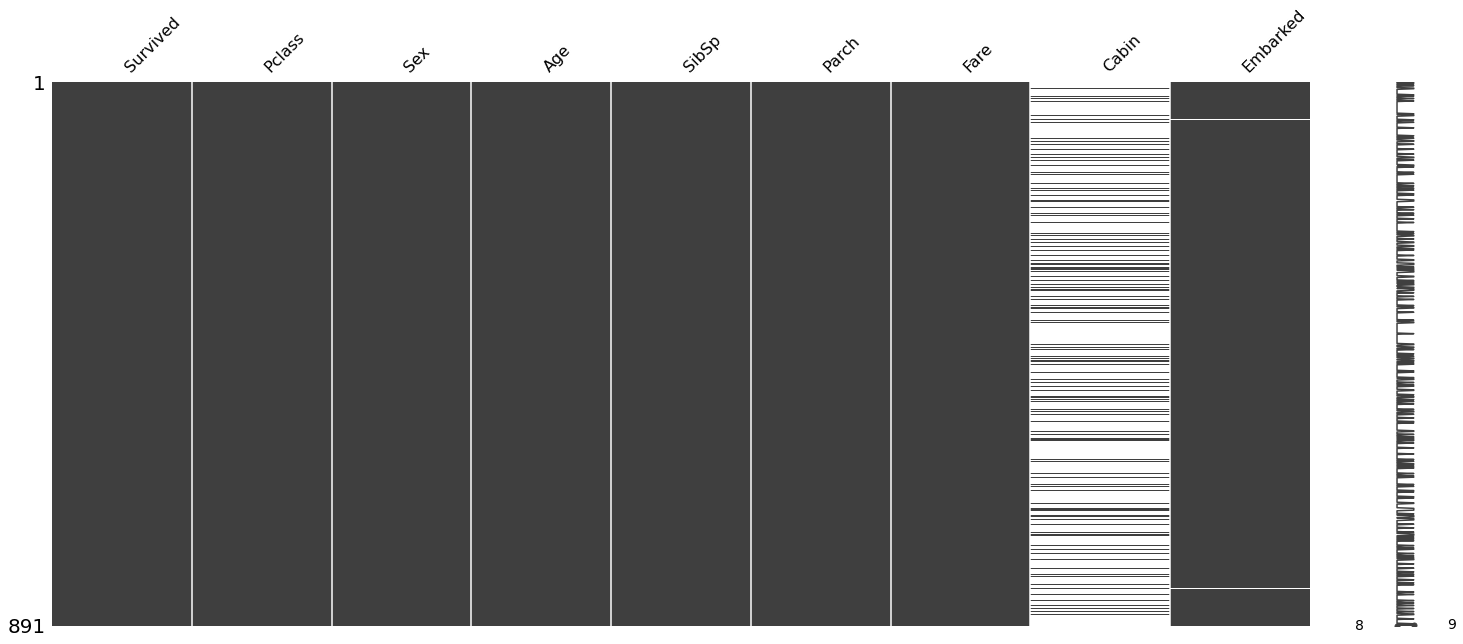

In [164]:
missingno.matrix(df)

In [165]:
df = df.drop(['Cabin'], axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,25.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [166]:
d = pd.get_dummies(train['Sex'], drop_first=True)
d

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [167]:
df['Sex'] = d

In [168]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,0,3,0,25.0,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


In [169]:
df = df.dropna(subset=['Embarked'])

In [170]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,0,3,0,25.0,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


In [171]:
e = pd.get_dummies(df.Embarked, drop_first=True)
e

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [172]:
df = pd.concat([df, e], axis=1)

In [173]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Q,S
0,0,3,1,22.0,1,0,7.2500,S,0,1
1,1,1,0,38.0,1,0,71.2833,C,0,0
2,1,3,0,26.0,0,0,7.9250,S,0,1
3,1,1,0,35.0,1,0,53.1000,S,0,1
4,0,3,1,35.0,0,0,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,0,1
887,1,1,0,19.0,0,0,30.0000,S,0,1
888,0,3,0,25.0,1,2,23.4500,S,0,1
889,1,1,1,26.0,0,0,30.0000,C,0,0


In [174]:
df = df.drop('Embarked', axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,1
887,1,1,0,19.0,0,0,30.0000,0,1
888,0,3,0,25.0,1,2,23.4500,0,1
889,1,1,1,26.0,0,0,30.0000,0,0


In [175]:
df.Age.isna().sum()

0

In [176]:
df.drop('Age', axis=1).corrwith(df['Age'])

Survived   -0.054934
Pclass     -0.401322
Sex         0.085564
SibSp      -0.242834
Parch      -0.174280
Fare        0.118205
Q          -0.070847
S           0.006325
dtype: float64

In [177]:
# Highest correlation is with SibSp, hence we can use this logic to fill the missing age values

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

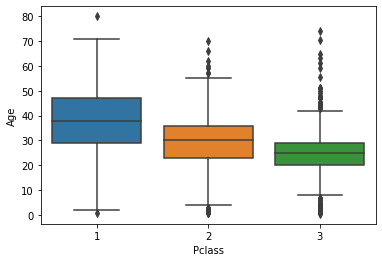

In [178]:
sns.boxplot(x='Pclass', y='Age', data=df)

In [179]:
g = df.groupby('Pclass').Pclass

In [180]:
df.groupby('Survived').mean()

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
Survived,,,,,,,,
0,2.531876,0.852459,29.787796,0.553734,0.329690,22.117887,0.085610,0.777778
1,1.955882,0.320588,28.299029,0.476471,0.467647,48.209498,0.088235,0.638235


In [181]:
df.groupby('Pclass').mean()

,Survived,Sex,Age,SibSp,Parch,Fare,Q,S
Pclass,,,,,,,,
1,0.626168,0.570093,38.090748,0.420561,0.359813,84.193516,0.009346,0.593458
2,0.472826,0.586957,29.884946,0.402174,0.380435,20.662183,0.016304,0.891304
3,0.242363,0.706721,25.101670,0.615071,0.393075,13.675550,0.146640,0.718941


In [182]:
# 1 : 38.1
# 2 : 29.8
# 3 : 25.1

In [183]:
def fill_age(cols):
    Age, Pclass = cols
    if not pd.isnull(Age):
        return Age
    else:
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25

In [184]:
df['Age'] = df[['Age', 'Pclass']].apply(fill_age, axis=1)

In [185]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,1
887,1,1,0,19.0,0,0,30.0000,0,1
888,0,3,0,25.0,1,2,23.4500,0,1
889,1,1,1,26.0,0,0,30.0000,0,0


In [186]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Q           0
S           0
dtype: int64

# Experiment 1 
#### Replaced missing Ages with the mean of the Ages of the Pclass. In further experiments need to try making bins for Age and Fare (right now we are just directly using them as continuous variable)

In [188]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,1
887,1,1,0,19.0,0,0,30.0000,0,1
888,0,3,0,25.0,1,2,23.4500,0,1
889,1,1,1,26.0,0,0,30.0000,0,0


In [211]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [205]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

In [206]:
# Trying one algorithm

X = df.drop('Survived', axis=1)
y = df.Survived

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [208]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8161434977578476

In [209]:
# Now applying GridSearchCV

In [237]:
model_params = {
    
    'random_forest': {
        'model' : RandomForestClassifier(),
        'params' : {
            'criterion' : ["gini", "entropy"],
            'n_estimators':[1, 5, 10, 8, 3]
        }
    },
    
    'gradient_boost': {
        'model' : GradientBoostingClassifier(),
        'params' : {
            'n_estimators':[ 50, 100, 150, 80],
            'max_depth':[3, 5, 8]
        }
    }
    
}

In [241]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False,
                            )
    clf.fit(X, y)
    scores.append({
        'model' : model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [242]:
scores_df = pd.DataFrame(scores)
scores_df

,model,best_score,best_params
0,random_forest,0.806538,"{'criterion': 'entropy', 'n_estimators': 8}"
1,gradient_boost,0.826801,"{'max_depth': 3, 'n_estimators': 150}"


In [240]:
from catboost import CatBoostClassifier

In [243]:
model = CatBoostClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

Learning rate set to 0.008661
0:	learn: 0.6874872	total: 47.9ms	remaining: 47.8s
1:	learn: 0.6816668	total: 48.7ms	remaining: 24.3s
2:	learn: 0.6758333	total: 50ms	remaining: 16.6s
3:	learn: 0.6703266	total: 51.2ms	remaining: 12.8s
4:	learn: 0.6650287	total: 51.8ms	remaining: 10.3s
5:	learn: 0.6596339	total: 52.6ms	remaining: 8.72s
6:	learn: 0.6540929	total: 53.6ms	remaining: 7.61s
7:	learn: 0.6490628	total: 54.5ms	remaining: 6.76s
8:	learn: 0.6445321	total: 55.6ms	remaining: 6.12s
9:	learn: 0.6397552	total: 56.7ms	remaining: 5.61s
10:	learn: 0.6355331	total: 57.6ms	remaining: 5.18s
11:	learn: 0.6306195	total: 58.6ms	remaining: 4.83s
12:	learn: 0.6259435	total: 59.6ms	remaining: 4.52s
13:	learn: 0.6214764	total: 60.5ms	remaining: 4.26s
14:	learn: 0.6167827	total: 61.5ms	remaining: 4.04s
15:	learn: 0.6130773	total: 62.4ms	remaining: 3.83s
16:	learn: 0.6102978	total: 63.1ms	remaining: 3.65s
17:	learn: 0.6061532	total: 64.1ms	remaining: 3.5s
18:	learn: 0.6016296	total: 65ms	remaining: 3.3

197:	learn: 0.3857963	total: 190ms	remaining: 769ms
198:	learn: 0.3854634	total: 193ms	remaining: 776ms
199:	learn: 0.3851636	total: 194ms	remaining: 775ms
200:	learn: 0.3847219	total: 195ms	remaining: 774ms
201:	learn: 0.3844442	total: 195ms	remaining: 772ms
202:	learn: 0.3841154	total: 196ms	remaining: 771ms
203:	learn: 0.3838478	total: 197ms	remaining: 770ms
204:	learn: 0.3836245	total: 198ms	remaining: 768ms
205:	learn: 0.3834515	total: 199ms	remaining: 767ms
206:	learn: 0.3832584	total: 200ms	remaining: 766ms
207:	learn: 0.3827392	total: 201ms	remaining: 765ms
208:	learn: 0.3825284	total: 202ms	remaining: 764ms
209:	learn: 0.3820833	total: 203ms	remaining: 763ms
210:	learn: 0.3818466	total: 204ms	remaining: 762ms
211:	learn: 0.3815700	total: 205ms	remaining: 761ms
212:	learn: 0.3811917	total: 208ms	remaining: 768ms
213:	learn: 0.3809741	total: 209ms	remaining: 768ms
214:	learn: 0.3804892	total: 210ms	remaining: 768ms
215:	learn: 0.3800928	total: 211ms	remaining: 767ms
216:	learn: 

457:	learn: 0.3356506	total: 379ms	remaining: 448ms
458:	learn: 0.3354391	total: 380ms	remaining: 448ms
459:	learn: 0.3353060	total: 381ms	remaining: 447ms
460:	learn: 0.3351871	total: 382ms	remaining: 446ms
461:	learn: 0.3349781	total: 383ms	remaining: 445ms
462:	learn: 0.3347281	total: 383ms	remaining: 444ms
463:	learn: 0.3345900	total: 384ms	remaining: 444ms
464:	learn: 0.3343476	total: 385ms	remaining: 443ms
465:	learn: 0.3341706	total: 385ms	remaining: 442ms
466:	learn: 0.3340613	total: 386ms	remaining: 441ms
467:	learn: 0.3339224	total: 387ms	remaining: 440ms
468:	learn: 0.3337860	total: 387ms	remaining: 439ms
469:	learn: 0.3336733	total: 389ms	remaining: 438ms
470:	learn: 0.3335102	total: 389ms	remaining: 437ms
471:	learn: 0.3332221	total: 391ms	remaining: 437ms
472:	learn: 0.3331454	total: 392ms	remaining: 436ms
473:	learn: 0.3329879	total: 393ms	remaining: 436ms
474:	learn: 0.3328977	total: 393ms	remaining: 435ms
475:	learn: 0.3327774	total: 394ms	remaining: 434ms
476:	learn: 

748:	learn: 0.2995888	total: 567ms	remaining: 190ms
749:	learn: 0.2994941	total: 568ms	remaining: 189ms
750:	learn: 0.2994111	total: 569ms	remaining: 189ms
751:	learn: 0.2993142	total: 570ms	remaining: 188ms
752:	learn: 0.2990791	total: 571ms	remaining: 187ms
753:	learn: 0.2989988	total: 572ms	remaining: 187ms
754:	learn: 0.2988662	total: 573ms	remaining: 186ms
755:	learn: 0.2986893	total: 574ms	remaining: 185ms
756:	learn: 0.2985687	total: 575ms	remaining: 185ms
757:	learn: 0.2982728	total: 576ms	remaining: 184ms
758:	learn: 0.2982294	total: 577ms	remaining: 183ms
759:	learn: 0.2981654	total: 578ms	remaining: 182ms
760:	learn: 0.2980227	total: 579ms	remaining: 182ms
761:	learn: 0.2977891	total: 581ms	remaining: 181ms
762:	learn: 0.2977110	total: 583ms	remaining: 181ms
763:	learn: 0.2976451	total: 584ms	remaining: 180ms
764:	learn: 0.2974730	total: 585ms	remaining: 180ms
765:	learn: 0.2973293	total: 586ms	remaining: 179ms
766:	learn: 0.2972926	total: 587ms	remaining: 178ms
767:	learn: 

0.8385650224215246

In [244]:
! pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 127.6 MB 55 kB/s s eta 0:00:01    |██████████████████████▍         | 89.3 MB 9.7 MB/s eta 0:00:04     |███████████████████████████████ | 123.3 MB 12.7 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [245]:
from xgboost.sklearn import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8340807174887892

In [246]:
clf = GridSearchCV(XGBClassifier(), {
    'learning_rate' : [0.01, 0.03, 0.1]
}, cv=5, return_train_score=False)
clf.fit(X, y)
print({'model' : model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_})
        

IndentationError: unexpected indent (<ipython-input-246-c70b0a2638af>, line 3)